In [1]:
# Import Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
csv_path = Path("Resources/Police_Incident_Reports.csv")
crime_data = pd.read_csv(csv_path, encoding="UTF-8")
print(f"There are {crime_data.shape[0]} records and {crime_data.shape[1]} columns.")
crime_data.head()

There are 170555 records and 12 columns.


OBJECTID  IncidentNumber           Date_Occurred              Date_Found  \
0         1      2022077686  2022/12/07 04:10:00+00  2022/12/07 04:20:00+00   
1         2      2022077830  2022/12/06 22:48:00+00  2022/12/06 22:48:00+00   
2         3      2022077830  2022/12/06 22:48:00+00  2022/12/06 22:48:00+00   
3         4      2022077885  2022/12/04 07:02:00+00  2022/12/04 10:01:00+00   
4         5      2022077890  2022/12/04 06:45:00+00  2022/12/04 07:45:00+00   

  Offense_Code        Offense_Description   Block                  Street  \
0         13B1            ASSAULT, SIMPLE  2400.0  CASTLETON COMMERCE WAY   
1         13B2  ASSAULT, SIMPLE, DOMESTIC   900.0          IRON BRIDGE DR   
2         13B2  ASSAULT, SIMPLE, DOMESTIC   900.0          IRON BRIDGE DR   
3         13B1            ASSAULT, SIMPLE   400.0             OCEANA BLVD   
4         13B2  ASSAULT, SIMPLE, DOMESTIC   300.0                 16TH ST   

  Precinct                 Subdivision Zone_ID            Case_Status  
0        1     CASTLETON COMMERCE PARK     124  EXCEPTIONALLY CLEARED  
1        4              BLUEGRASS PARK     426           UNDER REVIEW  
2        4              BLUEGRASS PARK     426           UNDER REVIEW  
3        2                      OCEANA     228           UNDER REVIEW  
4        2  OCEANFRONT - 31ST ST SOUTH     227      CLEARED BY ARREST

In [3]:
crime_data[crime_data["Case_Status"].str.contains('UNFOUND')]["OBJECTID"].count()

3610

In [4]:
# Clean data from Unfounded .
cleaned_crime_data= crime_data.loc[crime_data["Case_Status"].str.contains('UNFOUND') == False]
print(f"After removing Unfounded cases, there are {crime_data.shape[0] - 3610} = {len(cleaned_crime_data)} records.")

After removing Unfounded cases, there are 166945 = 166945 records.


In [5]:
# Review data types.
cleaned_crime_data.dtypes

OBJECTID                 int64
IncidentNumber           int64
Date_Occurred           object
Date_Found              object
Offense_Code            object
Offense_Description     object
Block                  float64
Street                  object
Precinct                object
Subdivision             object
Zone_ID                 object
Case_Status             object
dtype: object

In [6]:
# Warning ignoring code
pd.set_option('mode.chained_assignment', None)

# Convert 'Date_Found' to datetime format
cleaned_crime_data['Date_Found'] = pd.to_datetime(cleaned_crime_data['Date_Found'])

# Extract year and month from the 'Date_Found' column
cleaned_crime_data['Year'] = cleaned_crime_data['Date_Found'].dt.year
cleaned_crime_data['Month'] = cleaned_crime_data['Date_Found'].dt.month

cleaned_crime_data.dtypes



OBJECTID                             int64
IncidentNumber                       int64
Date_Occurred                       object
Date_Found             datetime64[ns, UTC]
Offense_Code                        object
Offense_Description                 object
Block                              float64
Street                              object
Precinct                            object
Subdivision                         object
Zone_ID                             object
Case_Status                         object
Year                                 int64
Month                                int64
dtype: object

In [7]:
# Distribution of data based on the 'Year' and 'Month' columns
df = cleaned_crime_data.loc[(cleaned_crime_data['Year'].isin([2021, 2022, 2023])) & (cleaned_crime_data['Month'] <= 6)]

print(df['Year'].value_counts().sort_index())
print()
print(df['Month'].value_counts().sort_index())

2021    12855
2022    13933
2023    15987
Name: Year, dtype: int64

1    6701
2    6283
3    7104
4    7150
5    7969
6    7568
Name: Month, dtype: int64


# Question 1: What are the Top 10 Part 1 offenses for the first half of each year by total count from 2021 to 2023?

In [8]:
df["Offense_Description"].value_counts().head(10)

LARCENY, FROM MOTOR VEHICLE                  3705
ASSAULT, SIMPLE                              3520
HIT & RUN                                    3462
DESTRUCTION OF PROPERTY, PRIVATE PROPERTY    3392
ASSAULT, SIMPLE, DOMESTIC                    2965
LARCENY, ALL OTHERS                          2322
DRUG/ NARCOTIC VIOLATIONS                    2256
LARCENY, SHOPLIFTING                         2129
WEAPON LAW VIOLATIONS                        1257
MOTOR VEHICLE THEFT                          1243
Name: Offense_Description, dtype: int64

<Figure size 1200x800 with 0 Axes>

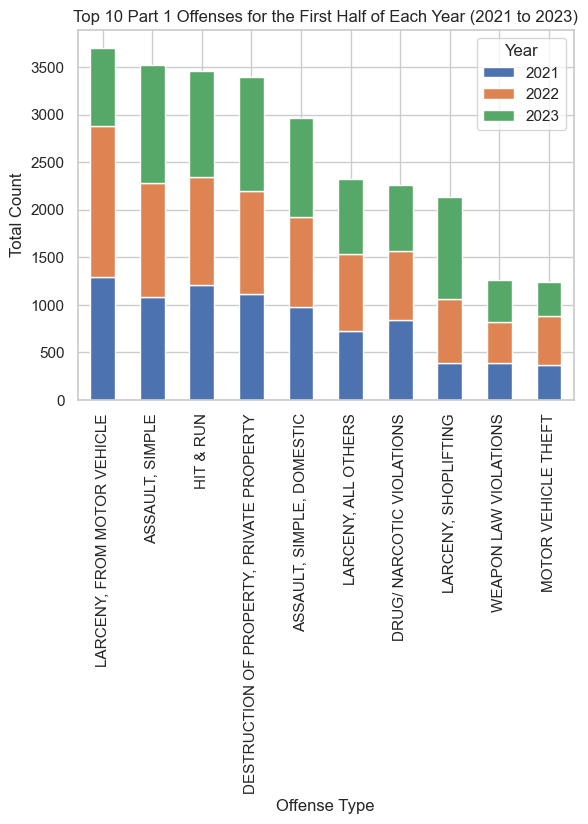

In [23]:
#Chart showing Top 10 Offenses for the First Half of Each Year (2021 to 2023)

# Set the style for better visualization
sns.set(style="whitegrid")

# Group data by year and offense type
grouped_data = df.groupby(['Year', 'Offense_Description']).size().reset_index(name='Count')

# Create a pivot table
pivot_table = grouped_data.pivot_table(index='Offense_Description', columns='Year', values='Count', aggfunc='sum', fill_value=0)

# Calculate total count for each offense
pivot_table['Total'] = pivot_table.sum(axis=1)

# Sort and extract top 10 offenses
top_10_offenses = pivot_table.sort_values(by='Total', ascending=False).head(10)

# Plot the results 
plt.figure(figsize=(12, 8))

# Plot stacked bar chart for top 10 offenses
top_10_offenses.drop('Total', axis=1).plot(kind='bar', stacked=True)

plt.title('Top 10 Part 1 Offenses for the First Half of Each Year (2021 to 2023)')
plt.xlabel('Offense Type')
plt.ylabel('Total Count')
plt.legend(title='Year', loc='upper right')

# Save the plot as an image file 
plt.savefig('top_10_offenses.png')

plt.show()


# Question 2 : What Zone had the most incidents for that crime type in the first half of 2023? Is this Top Zone trending up or down comparative to previous years?

In [10]:
# Filter data for LARCENY, FROM MOTOR VEHICLE and the first half of 2023
LARCENY_FROM_MOTOR_VEHICLE_2023 = cleaned_crime_data[(df['Offense_Description'] == 'LARCENY, FROM MOTOR VEHICLE') & (cleaned_crime_data['Year'] == 2023) & (cleaned_crime_data['Month'] <= 6)]

# Count incidents in each Zone for the first half of 2023
zone_incident_counts_2023 = LARCENY_FROM_MOTOR_VEHICLE_2023['Zone_ID'].value_counts()

zone_incident_counts_2023.head(10)

222    49
423    45
326    43
324    35
426    34
422    33
420    33
427    31
428    29
325    27
Name: Zone_ID, dtype: int64

In [11]:
# Identify the Top Zone for the first half of 2023
top_zone_2023 = zone_incident_counts_2023.idxmax()

# Display the result
print(f"The Zone with the most LARCENY, FROM MOTOR VEHICLE incidents in the first half of 2023 is Zone {top_zone_2023}.")

The Zone with the most LARCENY, FROM MOTOR VEHICLE incidents in the first half of 2023 is Zone 222.


In [12]:
# Calculate incident counts for the Top Zone in previous years
historical_top_zone_counts = cleaned_crime_data.loc[(cleaned_crime_data['Offense_Description'] == 'LARCENY, FROM MOTOR VEHICLE') & (crime_data['Zone_ID'] == top_zone_2023)]['Year'].value_counts()

# Display the trend
if len(historical_top_zone_counts) > 1:
    trend = 'up' if historical_top_zone_counts.idxmax() == 2023 else 'down'
    print(f"The trend for Zone {top_zone_2023} compared to previous years is {trend}.")
else:
    print(f"Not enough historical data to determine the trend for Zone {top_zone_2023}.")


The trend for Zone 222 compared to previous years is up.


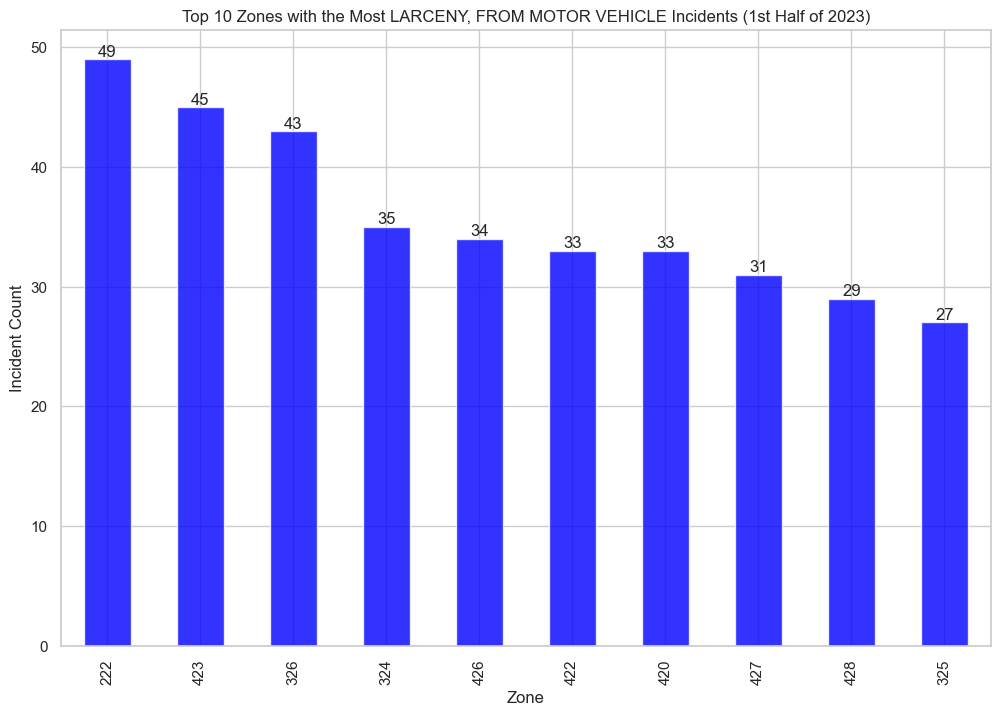

In [13]:
# Plot bar chart for Zone incidents in the first half of 2023
plt.figure(figsize=(12, 8))
bar_chart = zone_incident_counts_2023.head(10).plot(kind='bar', color='blue', alpha=0.8)

# Add the count of incidents to each bar
for idx, value in enumerate(zone_incident_counts_2023.head(10)):
    bar_chart.text(idx, value, str(value), ha='center', va='bottom')

plt.title('Top 10 Zones with the Most LARCENY, FROM MOTOR VEHICLE Incidents (1st Half of 2023)')
plt.xlabel('Zone')
plt.ylabel('Incident Count')

# Save the plot as an image file 
plt.savefig('Top 10 Zones.png')

plt.show()


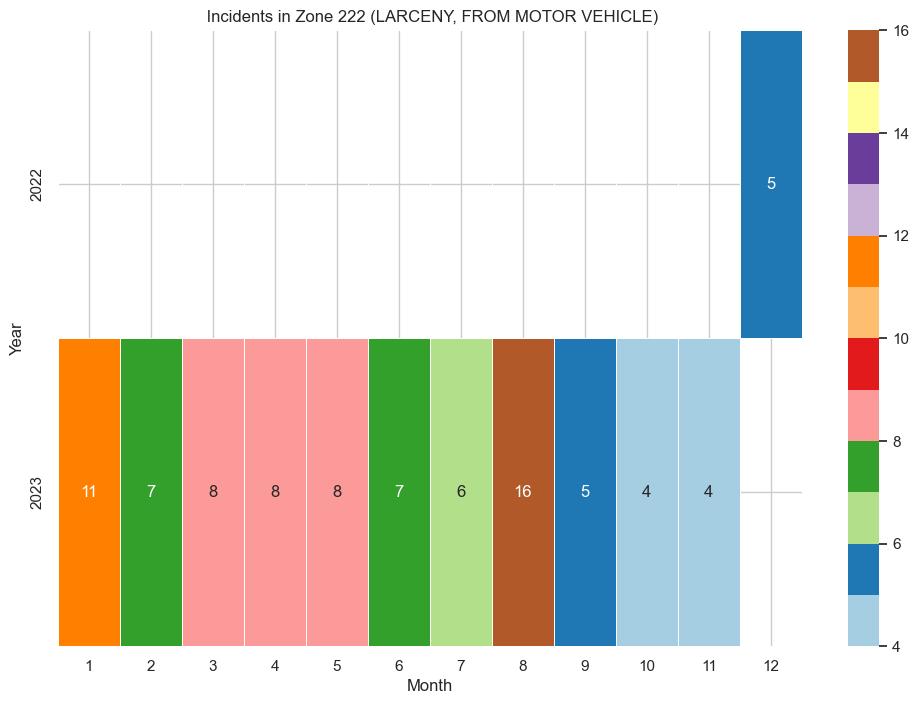

In [14]:
# Create a dataframe for heatmap
heatmap_data = cleaned_crime_data.loc[(cleaned_crime_data['Offense_Description'] == 'LARCENY, FROM MOTOR VEHICLE') & (cleaned_crime_data['Zone_ID'] == top_zone_2023)]
heatmap_data = heatmap_data.pivot_table(index='Year', columns='Month', values='OBJECTID', aggfunc='count')

# Plot heatmap for yearly incidents in the top zone
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Paired', annot=True, fmt='g', linewidths=.5)
plt.title(f' Incidents in Zone {top_zone_2023} (LARCENY, FROM MOTOR VEHICLE)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.savefig('Incidents in Zone 222.png')
plt.show()


# Question 2 Bonus : list the maximum value, minimum value, mean, 1 standard deviation value, and 2 standard deviation value

In [15]:
# Calculate the maximum value
max_value = historical_top_zone_counts.max()

# Calculate the minimum value
min_value = historical_top_zone_counts.min()

# Calculate the mean
mean_value = historical_top_zone_counts.mean()

# Calculate 1 standard deviation value
std_dev_1_value = mean_value + historical_top_zone_counts.std()

# Calculate 2 standard deviation value
std_dev_2_value = mean_value + 2 * historical_top_zone_counts.std()

# Display the results
print(f"Maximum value: {max_value}")
print(f"Minimum value: {min_value}")
print(f"Mean value: {mean_value}")
print(f"1 Standard Deviation value: {std_dev_1_value}")
print(f"2 Standard Deviation value: {std_dev_2_value}")


Maximum value: 84
Minimum value: 5
Mean value: 44.5
1 Standard Deviation value: 100.36143571373725
2 Standard Deviation value: 156.2228714274745


# Question 3: Using ZoneID 222 ,What are the Top 10 address blocks with the most incidents in the first half of 2023? Is the top block segment a systemic problem or was this an outlier?

In [16]:
# Exploring the data for LARCENY_FROM_MOTOR_VEHICLE_2023
LARCENY_FROM_MOTOR_VEHICLE_2023.head()

OBJECTID  IncidentNumber           Date_Occurred  \
5958      5959      2023021492  2023/04/18 14:10:00+00   
5979      5980      2023018142  2023/03/30 19:30:00+00   
6019      6020      2023027946  2023/05/19 20:00:00+00   
6025      6026      2023026981  2023/05/14 04:01:00+00   
6090      6091      2023007857  2023/02/09 03:00:00+00   

                    Date_Found Offense_Code          Offense_Description  \
5958 2023-04-18 14:30:00+00:00          23F  LARCENY, FROM MOTOR VEHICLE   
5979 2023-03-30 20:30:00+00:00          23F  LARCENY, FROM MOTOR VEHICLE   
6019 2023-05-19 20:00:00+00:00          23F  LARCENY, FROM MOTOR VEHICLE   
6025 2023-05-14 13:08:00+00:00          23F  LARCENY, FROM MOTOR VEHICLE   
6090 2023-02-09 11:00:00+00:00          23F  LARCENY, FROM MOTOR VEHICLE   

       Block               Street Precinct                 Subdivision  \
5958   300.0             DOVER CT        2                         222   
5979   800.0  VIRGINIA BEACH BLVD        2  OCEANFRONT - 31ST ST SOUTH   
6019     NaN                  NaN      NaN                         NaN   
6025     NaN                  NaN      NaN                         NaN   
6090  5700.0         GREENWICH RD        4            GREENWICH CORNER   

     Zone_ID         Case_Status  Year  Month  
5958     222  PENDING - INACTIVE  2023      4  
5979     225   CLEARED BY ARREST  2023      3  
6019     NaN    PENDING - ACTIVE  2023      5  
6025     NaN    PENDING - ACTIVE  2023      5  
6090     423  PENDING - INACTIVE  2023      2

In [17]:
# Convert 'Zone_ID' column to numeric, errors='coerce' will replace non-numeric values with NaN
LARCENY_FROM_MOTOR_VEHICLE_2023['Zone_ID'] = pd.to_numeric(LARCENY_FROM_MOTOR_VEHICLE_2023['Zone_ID'], errors='coerce')

# Filter data for LARCENY, FROM MOTOR VEHICLE, Zone 222, and non-NaN values in 'Zone_ID'
larceny_data_zone_222_2023 = LARCENY_FROM_MOTOR_VEHICLE_2023[
    (LARCENY_FROM_MOTOR_VEHICLE_2023['Zone_ID'] == 222) &
    (~LARCENY_FROM_MOTOR_VEHICLE_2023['Zone_ID'].isna())
]

# Display the first few rows
larceny_data_zone_222_2023.head()


OBJECTID  IncidentNumber           Date_Occurred  \
5958      5959      2023021492  2023/04/18 14:10:00+00   
6496      6497      2023003493  2023/01/18 04:00:00+00   
7647      7648      2023017589  2023/03/29 11:54:00+00   
8591      8592      2023030354  2023/05/30 04:00:00+00   
8662      8663      2023010098  2023/02/20 17:20:00+00   

                    Date_Found Offense_Code          Offense_Description  \
5958 2023-04-18 14:30:00+00:00          23F  LARCENY, FROM MOTOR VEHICLE   
6496 2023-01-18 13:00:00+00:00          23F  LARCENY, FROM MOTOR VEHICLE   
7647 2023-03-29 11:54:00+00:00          23F  LARCENY, FROM MOTOR VEHICLE   
8591 2023-05-30 04:00:00+00:00          23F  LARCENY, FROM MOTOR VEHICLE   
8662 2023-02-20 17:20:00+00:00          23F  LARCENY, FROM MOTOR VEHICLE   

       Block          Street Precinct                Subdivision  Zone_ID  \
5958   300.0        DOVER CT        2                        222    222.0   
6496  1800.0      ENGLISH CT        2        MAPLE BAY TOWNHOMES    222.0   
7647   300.0  S AMSTERDAM CT        2        MAPLE BAY TOWNHOMES    222.0   
8591  1800.0        STEVE LN        2              HILLTOP MANOR    222.0   
8662  1900.0    KING JOHN CT        2  EMERALD ISLE/REGENCY APTS    222.0   

             Case_Status  Year  Month  
5958  PENDING - INACTIVE  2023      4  
6496    PENDING - ACTIVE  2023      1  
7647  PENDING - INACTIVE  2023      3  
8591  PENDING - INACTIVE  2023      5  
8662  PENDING - INACTIVE  2023      2

In [18]:
# Count incidents in each address block for the first half of 2023 in Zone 222
address_block_counts_zone_222_2023 = larceny_data_zone_222_2023['Block'].value_counts()

# Identify the Top 10 address blocks in Zone 222
top_10_address_blocks_zone_222 = address_block_counts_zone_222_2023.head(10)

# Display the results
print("Top 10 Address Blocks with the most incidents in the first half of 2023 in Zone 222:")
print(top_10_address_blocks_zone_222)


Top 10 Address Blocks with the most incidents in the first half of 2023 in Zone 222:
300.0     13
1900.0     7
1800.0     6
800.0      5
2400.0     4
400.0      3
500.0      3
2000.0     3
2300.0     2
700.0      2
Name: Block, dtype: int64


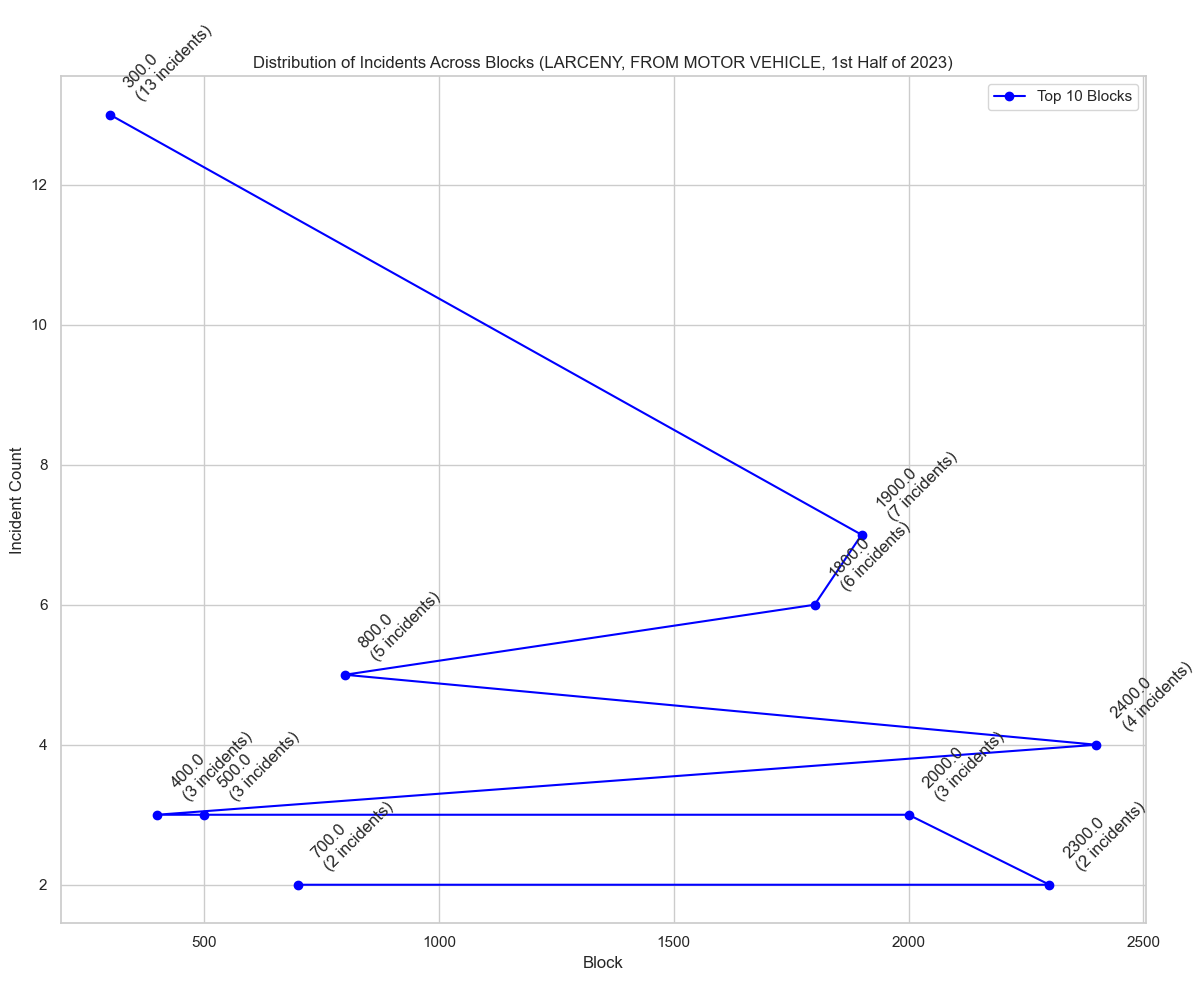

In [19]:
# Plot the distribution of incident counts as a line chart .
plt.figure(figsize=(14, 11))
line_chart = top_10_address_blocks_zone_222.plot(kind='line', marker='o', color='blue', label='Top 10 Blocks')

# Add annotations for block numbers.
for block, count in top_10_address_blocks_zone_222.items():
    plt.annotate(f'{block}\n({count} incidents)', xy=(block, count), xytext=(8, 8), textcoords='offset points', ha='left', va='bottom', rotation=45)

plt.title('Distribution of Incidents Across Blocks (LARCENY, FROM MOTOR VEHICLE, 1st Half of 2023)')
plt.xlabel('Block')
plt.ylabel('Incident Count')
plt.legend()
plt.savefig('Incidents_in_Blocs_222.png')


plt.show()


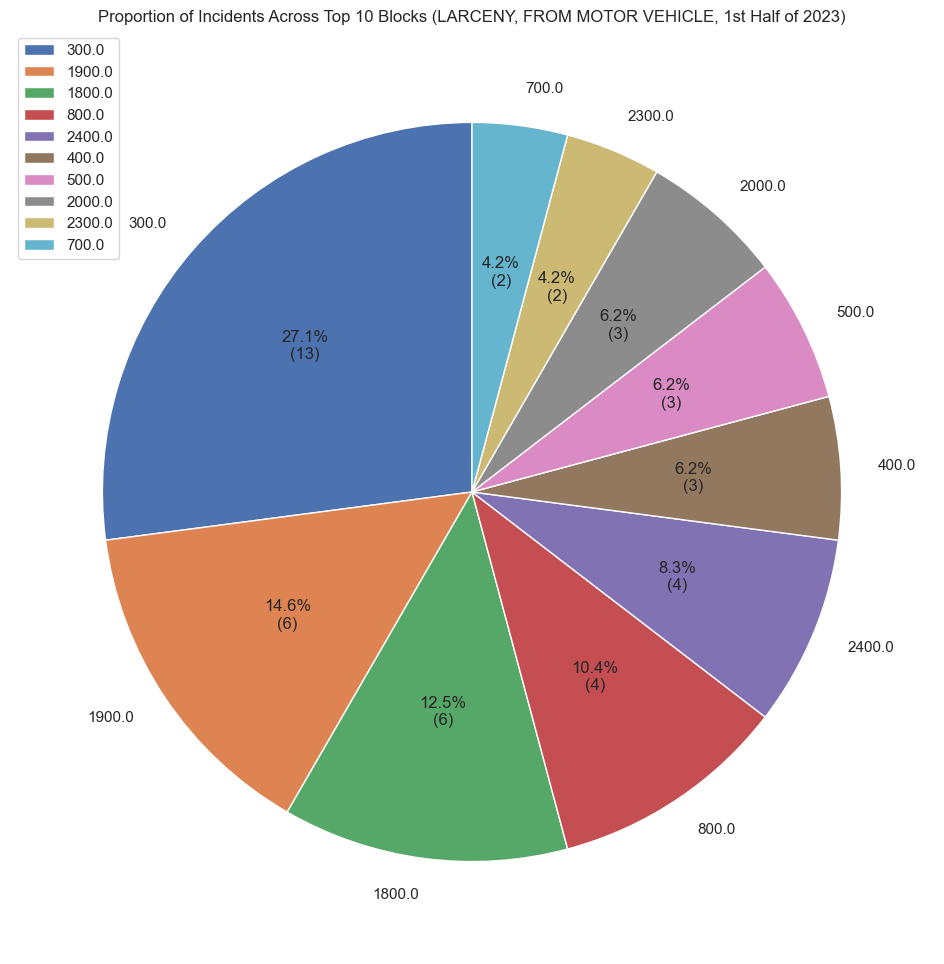

In [20]:
# Creat a pie chart for top 10 Bl0cks in Zone 222.

plt.figure(figsize=(12, 12))

# Plot the pie chart
pie_chart = top_10_address_blocks_zone_222.plot(kind='pie', autopct=lambda p: f'{p:.1f}%\n({int(p/100*top_10_address_blocks_zone_222.sum())})', startangle=90, legend=False)

# Remove default labels
plt.ylabel('')

# Add a title
plt.title('Proportion of Incidents Across Top 10 Blocks (LARCENY, FROM MOTOR VEHICLE, 1st Half of 2023)')

# Add a legend with block numbers
plt.legend(labels=top_10_address_blocks_zone_222.index, loc='upper left')

plt.savefig('Incidents_in_top_Blocks_Zone_222.png')

plt.show()



In [21]:
# Calculate mean and standard deviation for incident counts in all blocks
mean_all_blocks = address_block_counts_zone_222_2023.mean()
std_all_blocks = address_block_counts_zone_222_2023.std()

# Calculate z-scores for the top 10 blocks in Zone 222
z_scores_top_blocks_zone_222 = (address_block_counts_zone_222_2023 - mean_all_blocks) / std_all_blocks

# Check if any of the top 10 blocks in Zone 222 are considered outliers.
is_outlier_zone_222 = z_scores_top_blocks_zone_222 > 4  

In [22]:
# Print the result
if is_outlier_zone_222.any():
    print("The top address blocks in Zone 222 are considered outliers.")
else:
    print("The top address blocks in Zone 222 are not considered outliers.")
print(f" It indicates that these blocks have a significantly different pattern of incidents compared to the overall pattern in Zone_ID 222 during the first half of 2023..")

The top address blocks in Zone 222 are not considered outliers.
 It indicates that these blocks have a significantly different pattern of incidents compared to the overall pattern in Zone_ID 222 during the first half of 2023..
